In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from code.evaluation import (compute_horizon_degradation_metrics,
                             plot_forecast_degradation,
                             plot_selected_horizons,
                             plot_forecast_trajectory,
                             compute_forecast_metrics)

from code.data_utils import clean_actual_data, clean_forecast_data

In [2]:
actual = pd.read_csv(r'../data/explore/inst_load.csv')
forecast = pd.read_csv(r'../data/explore/very_short_load_frcst.csv')

In [3]:
actual_df = clean_actual_data(actual)
forecast_df = clean_forecast_data(forecast)

In [8]:
actual_df.head()

,timestamp,load
0,2025-05-18 04:05:00,77106.92
1,2025-05-18 04:10:01,76719.06
2,2025-05-18 04:15:00,76637.16
3,2025-05-18 04:20:00,76117.32
4,2025-05-18 04:25:00,75888.00


In [7]:
forecast_df.head()

,issued_at,target_time,forecast_load,horizon
0,2025-05-18 04:05:00,2025-05-18 04:05:00,77880.0,0
1,2025-05-18 04:05:00,2025-05-18 04:10:00,77849.0,1
2,2025-05-18 04:05:00,2025-05-18 04:15:00,77797.0,2
3,2025-05-18 04:05:00,2025-05-18 04:20:00,77717.0,3
4,2025-05-18 04:05:00,2025-05-18 04:25:00,77597.0,4


In [9]:
actual_df.shape

(287, 2)

In [10]:
forecast_df.shape

(6864, 4)

In [11]:
forecast_df.shape[0]/actual_df.shape[0]

23.916376306620208

In [43]:
print(actual_df.dtypes)
print(forecast_df.dtypes)

timestamp    datetime64[ns]
load                float64
dtype: object
issued_at        datetime64[ns]
target_time      datetime64[ns]
forecast_load           float64
horizon                   int64
dtype: object


In [12]:
actual_df['timestamp'].min(), actual_df['timestamp'].max()

(Timestamp('2025-05-18 04:05:00'), Timestamp('2025-05-19 03:55:00'))

In [13]:
forecast_df['issued_at'].min(), forecast_df['issued_at'].max()

(Timestamp('2025-05-18 04:05:00'), Timestamp('2025-05-19 03:50:00'))

In [14]:
forecast_df['target_time'].min(), forecast_df['target_time'].max()

(Timestamp('2025-05-18 04:05:00'), Timestamp('2025-05-19 05:45:00'))

In [15]:
df_metrics = compute_horizon_degradation_metrics(actual_df, forecast_df)
df_metrics

,horizon,MAE,MSE,RMSE,MAPE (%),SMAPE (%)
0,0,117.183076,2.308164e+04,151.926427,0.151644,0.151589
1,1,267.621111,9.980668e+04,315.921948,0.346606,0.346615
2,2,434.310031,2.562894e+05,506.250330,0.562422,0.562607
3,3,603.217975,4.933585e+05,702.394805,0.780964,0.781439
4,4,771.636926,8.110950e+05,900.608145,0.998696,0.999572
5,5,940.528534,1.209677e+06,1099.853225,1.216931,1.218312
6,6,1111.786576,1.690463e+06,1300.177896,1.438145,1.440138
7,7,1284.193150,2.251490e+06,1500.496709,1.660730,1.663442
8,8,1456.763080,2.892382e+06,1700.700378,1.883391,1.886922
9,9,1629.081541,3.612560e+06,1900.673681,2.105595,2.110039


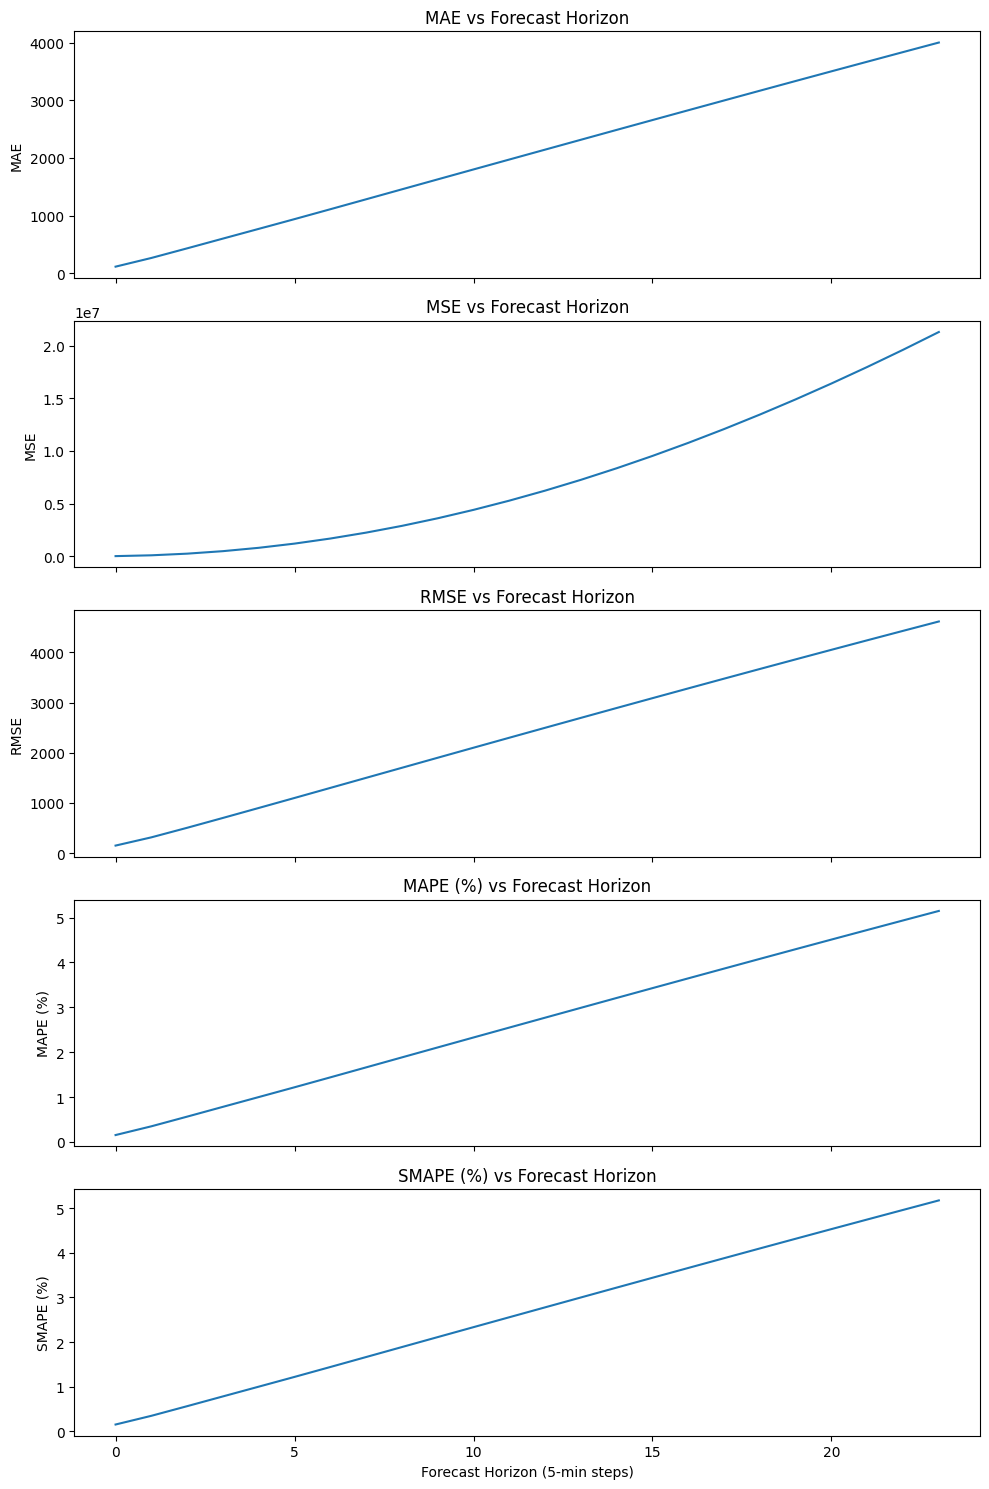

In [16]:
plot_forecast_degradation(df_metrics)

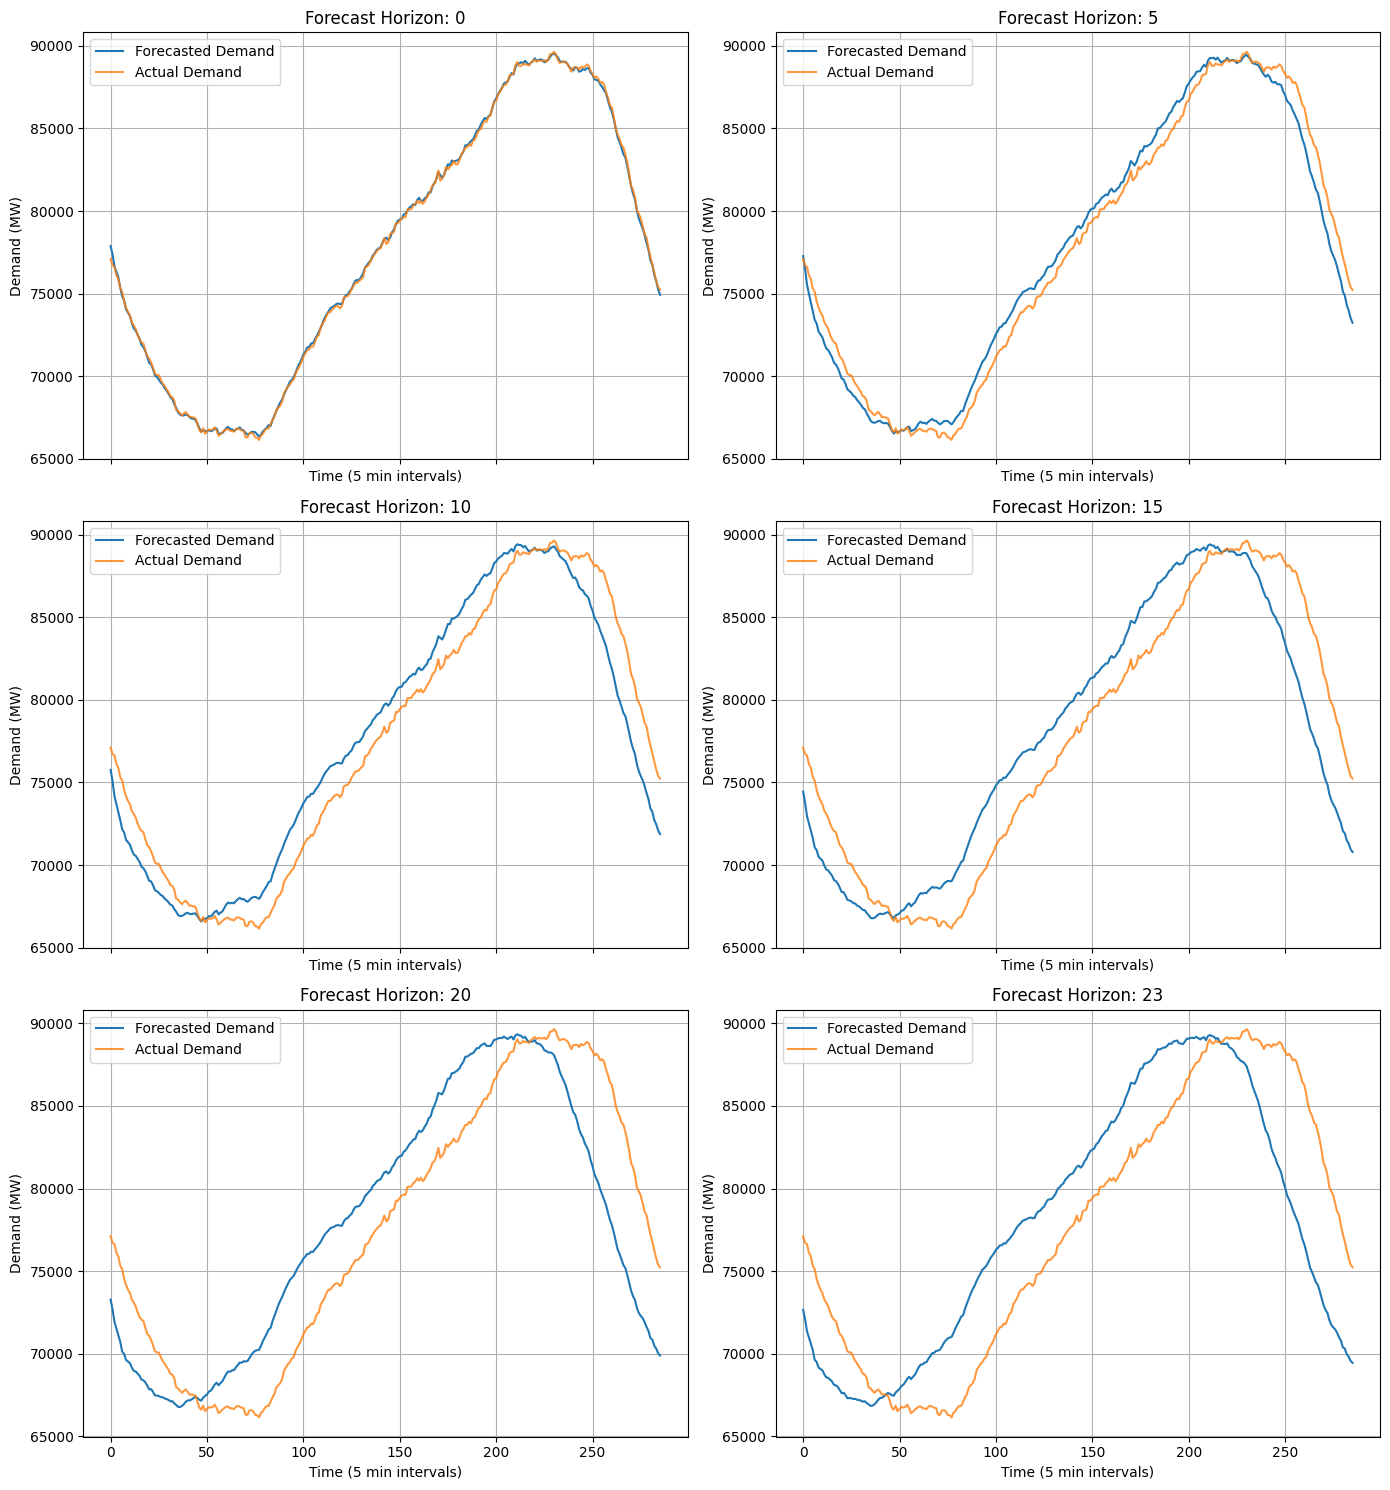

In [17]:
plot_selected_horizons(actual_df, forecast_df)

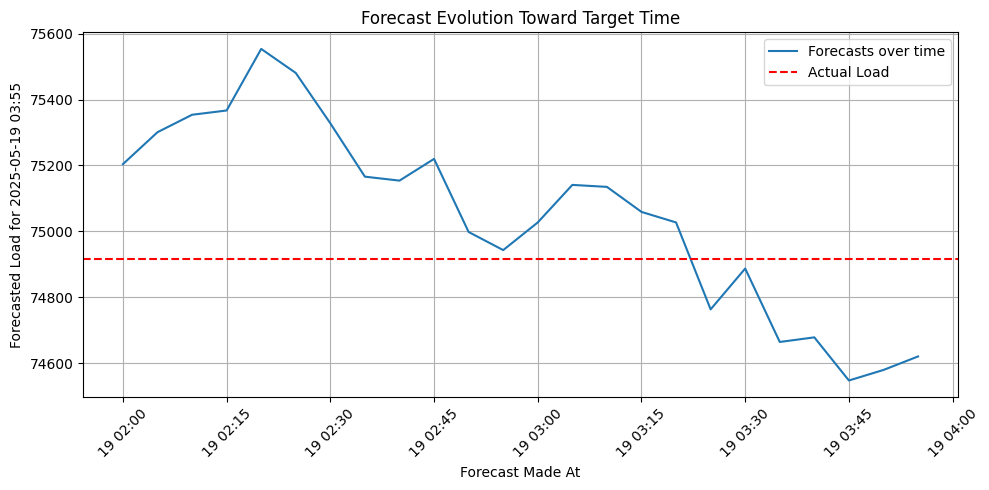

In [25]:
target_time = pd.Timestamp("05/19/2025 03:55:00 AM")
plot_forecast_trajectory(actual_df, forecast_df, target_time)